---
title: Spatial Weights
author: Serge Rey
date: '2023-03-02'
execute: 
  enabled: true
format:
  html:
    theme:
      light: flatly
      dark: darkly
    toc: true
    code-fold: true
jupyter: python3
---

## Spatial Weights

### Outline

- Weights General Concepts
- Contiguity Weights
- Distance Based Weights
- General Weights
- Guidance

## Weights General Concepts

### Why Spatial Weights

#### Identification Problem
- total number of interactions is $n(n-1)/2$
- all possible unique paris $i-j$
- only $n$ observations avaialable in a cross-section

#### Indicental Parameter Problem

- number of parameters increases with size of the sample $O(n^2)$
- more data is not the solution

### Problem: Spatial Correlation
- $C[y_i, y_j] \ne 0 \ \forall i \ne j$
- $n(n-1)/2$ covariances
- Only $n$ observations at hand

### Solution

#### Impose Structure on the Problem
- set some interactions to zero
- only "neighbors" interact directly
- constrain the number of neighbors

#### Assume a Single Parameter
- spatial autocorrelation coefficient

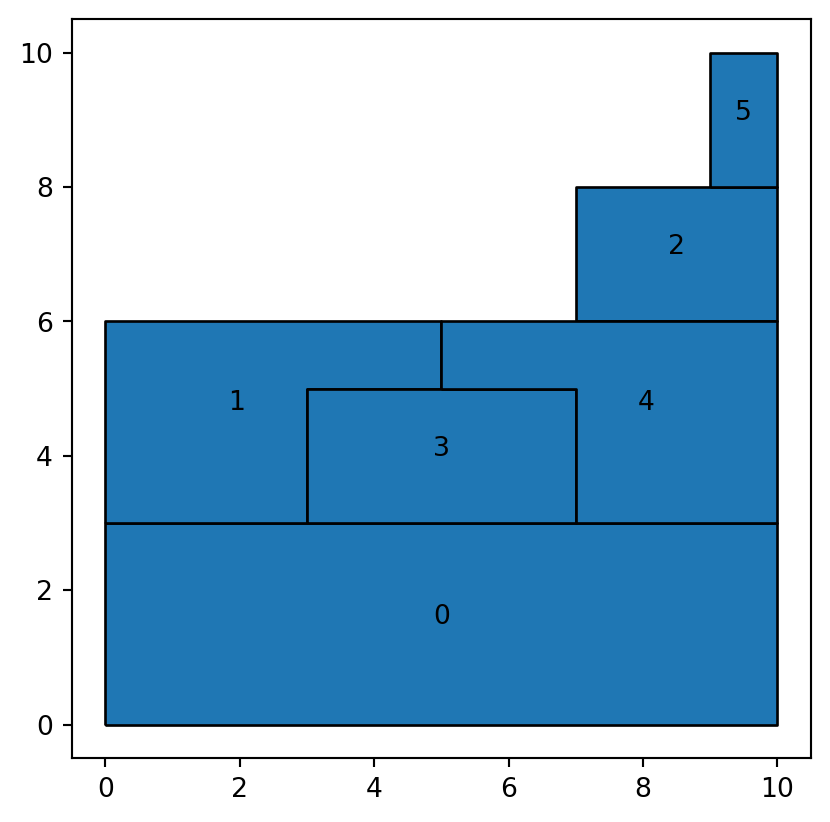

In [1]:
from shapely.geometry import Polygon
import geopandas

p0 = Polygon([(0,0), (10,0), (10, 3),
              (7,3), (3,3), (0, 3), (0, 0)])

p1 = Polygon([(0,3), (0,6), (5,6), (5,5), (3,5), (3,3), (0,3)])


p2 = Polygon([(7,6), (7, 8), (9,8), (10, 8), (10, 6), (7,6)])


p3 = Polygon([(3,3), (3,5), (7,5), (7,3), (3,3)])


p4 = Polygon([(5, 5), (5, 6), (7,6), (10, 6), (10, 3), (7,3), (7,5), (5,5)])


p5 = Polygon([(9, 8), (9, 10), (10, 10), (10, 8)])

gs = geopandas.GeoSeries([p0, p1, p2, p3, p4, p5])
gdf = geopandas.GeoDataFrame(geometry=gs)
gdf['Label'] = [0,1,2,3,4,5]

import matplotlib.pyplot as plt
ax = gdf.plot(edgecolor='k')
gdf.apply(lambda x: ax.annotate(text=x['Label'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);

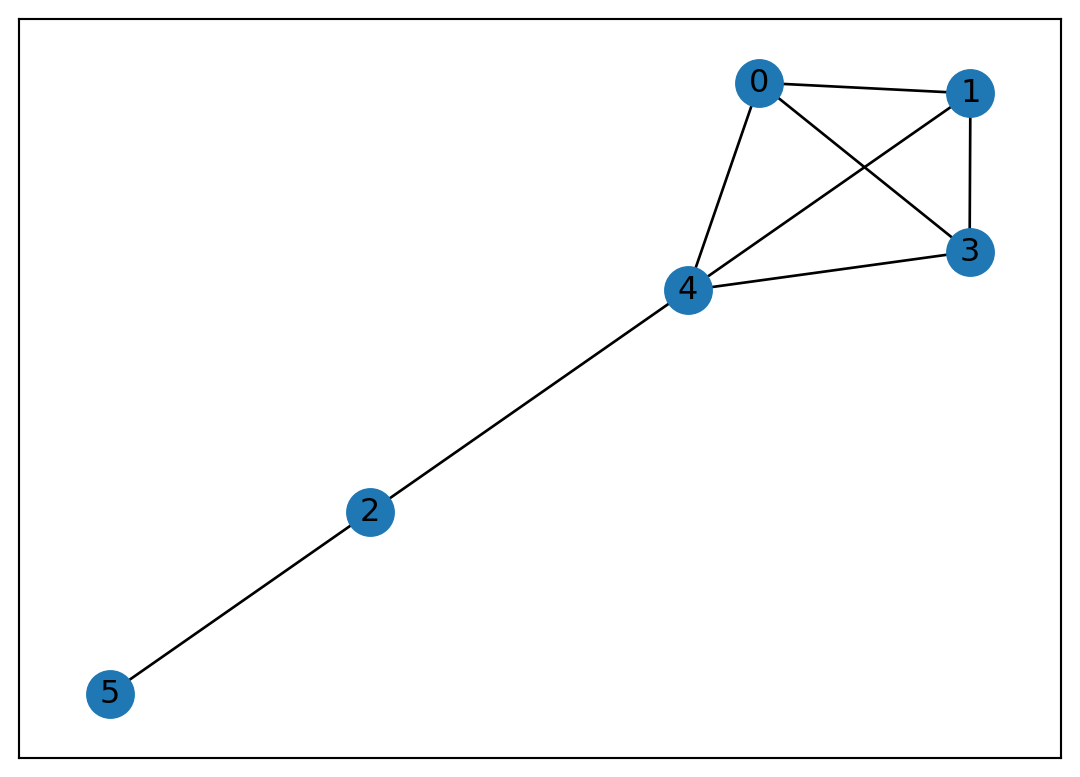

In [2]:
import libpysal
import networkx

W = libpysal.weights.Rook.from_dataframe(gdf)

G = W.to_networkx()

networkx.draw_networkx(G)
plt.show()

<Figure size 1536x864 with 0 Axes>

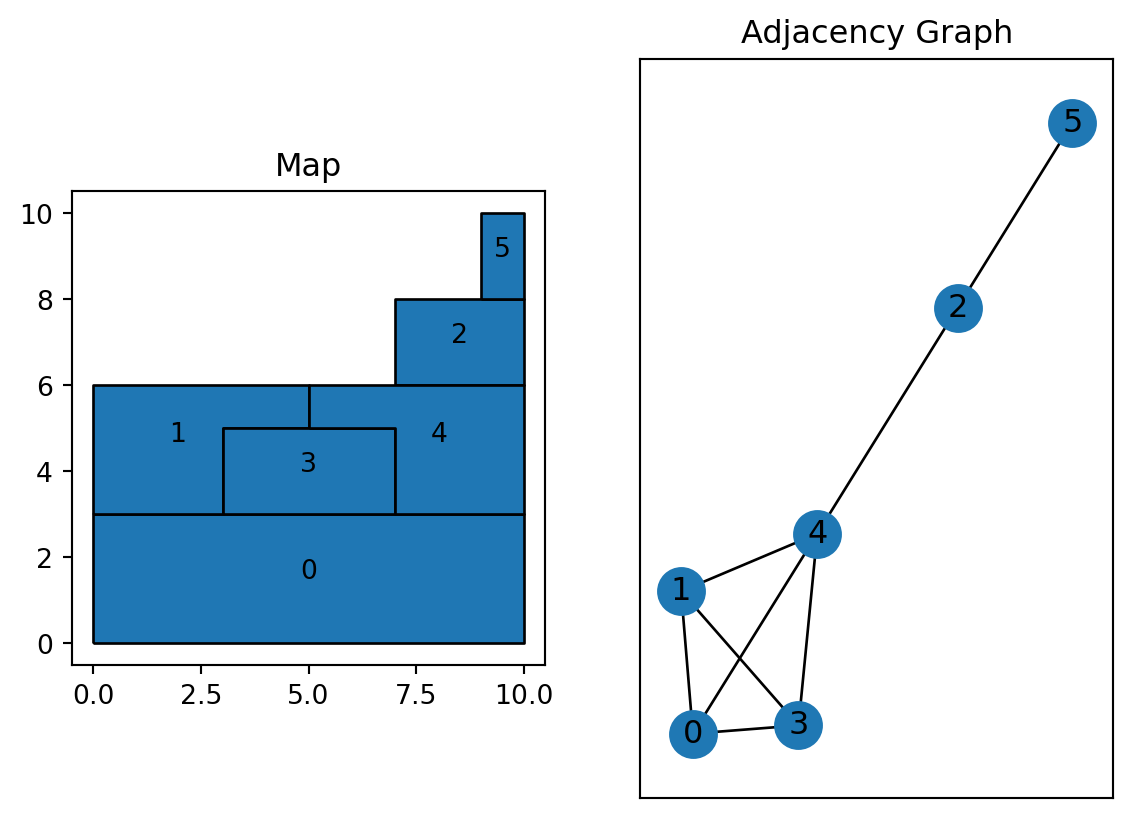

In [3]:
_ = plt.figure(figsize=(16, 9));

fig, (ax1, ax2)  = plt.subplots(1, 2);
_ = gdf.plot(ax=ax1, edgecolor='k');
_ = gdf.apply(lambda x: ax1.annotate(text=x['Label'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);
_ = networkx.draw_networkx(G, ax=ax2);
_ = ax1.set_title('Map')
_ = ax2.set_title('Adjacency Graph')
_ = plt.show()

### Spatial Weights Matrix
- Definition
  - $n$ by $n$ positive matrix $W$, elements $w_{i,j}$
  - $w_{i,j}$ nonzero for neighbors, $0$ otherwise
  - $w_{i,i} = 0$, no self-neighbors
  
  
  General:
  
$$ W = 
  \begin{bmatrix}
w_{1,1} & w_{1,2} & \ldots & w_{1,n} \\
w_{2,1} & w_{2,2} & \ldots & w_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
w_{n,1} & w_{n,2} & \ldots & w_{n,n} \\
\end{bmatrix} 
$$
  

### Binary Contiguity

- Weights are $0$ or $1$
- for $i,j$ neighbors, $w_{i,j}=1$
- Example for our map using common boundary
 
$$ W = 
  \begin{bmatrix}
0 & 1 & 0 & 1 & 1 & 0 \\
1 & 1 & 0 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 & 1 \\
1 & 1 & 0 & 0 & 1 & 0 \\
1 & 1 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
\end{bmatrix} 
$$

### Example
Polygons $0$ and $4$ share a boundary

$$ W = 
  \begin{bmatrix}
0 & 1 & 0 & 1 & \textbf{1} & 0 \\
1 & 1 & 0 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 & 1 \\
1 & 1 & 0 & 0 & 1 & 0 \\
\textbf{1} & 1 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
\end{bmatrix} 
$$

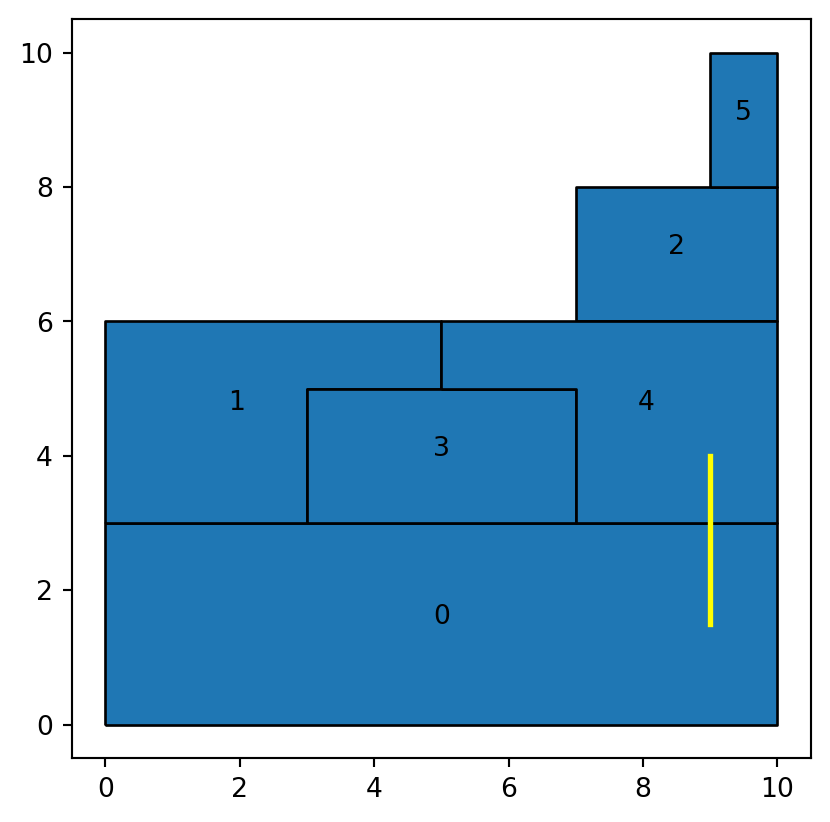

In [4]:
import matplotlib.lines as lines

ax = gdf.plot(edgecolor='k')
gdf.apply(lambda x: ax.annotate(text=x['Label'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);
line = lines.Line2D([9, 9], [1.5, 4],
                    lw=2, color='yellow', axes=ax)
ax.add_line(line)

## Contiguity Weights

## Distance Based Weights

## General Weights

## Guidance